**Выдвигаемые гипотизы:**
  1.  Существует корреляция между количеством комнат в квартире и ее ценой за квадратный метр.
  2.  Чем выше этаж квартиры, тем дороже она стоит.

**Подключаем библиотеки**

In [161]:
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

**Подключаем базу данных**

In [162]:
df = pd.read_csv('Cian.csv', sep=',')
df

,Unnamed: 0,Ссылка,Комнаты,Цена,Цена за метр,Метро,Время до метро(мин),Площадь(м2),Максимальный этаж,Этаж,Тип строения,Тип жилья
0,0,https://www.cian.ru/sale/flat/301871490/,2,27300000,446078,Полежаевская,17,61.2,27,17,Квартира,Вторичка
1,1,https://mytishchi.cian.ru/sale/flat/301871465/,3,15400000,215385,Медведково,9,71.5,22,8,Квартира,Новостройка
2,2,https://khimki.cian.ru/sale/flat/301871438/,2,8050000,180089,Левобережная,9,44.7,5,5,Квартира,Вторичка
3,3,https://www.cian.ru/sale/flat/301871419/,2,19490000,382157,Багратионовская,7,51.0,17,3,Квартира,Вторичка
4,4,https://solnechnogorsk.cian.ru/sale/flat/30187...,2,7000000,132827,Зеленоград — Крюково,6,52.7,9,7,Квартира,Вторичка
...,...,...,...,...,...,...,...,...,...,...,...,...
1222,1226,https://www.cian.ru/sale/flat/301810887/,4,26300000,274817,Кузьминки,14,95.7,23,4,Квартира,Вторичка
1223,1227,https://ramenskoye.cian.ru/sale/flat/301810877/,1,5500000,179739,Фабричная,5,30.6,17,9,Квартира,Вторичка
1224,1228,https://reutov.cian.ru/sale/flat/301810832/,1,6600000,222222,Новокосино,15,29.7,25,16,Квартира,Вторичка
1225,1229,https://www.cian.ru/sale/flat/301810831/,2,22350000,397687,Белорусская,9,56.2,12,10,Квартира,Вторичка


**Приводим таблицу в вид, удобный для анализа**

In [163]:
for i in range(len(df)):
    if 'откроется' in df['Время до метро(мин)'][i].split(' '): #удаляю строки с метро "откроется в 2025/2024"
        df.drop([i],inplace=True)
for column in df.columns:
    if column != 'Ссылка' and column != 'Метро' and column != 'Площадь(м2)' and column != 'Тип строения' and column != 'Тип жилья': 
        df[column] = df[column].astype(int)   #перевожу необходимые строки в формат цифр
df['Площадь(м2)'] = df['Площадь(м2)'].astype (float)
df.drop('Unnamed: 0', axis=1, inplace=True)  #удаляю лишний столбец
df

,Ссылка,Комнаты,Цена,Цена за метр,Метро,Время до метро(мин),Площадь(м2),Максимальный этаж,Этаж,Тип строения,Тип жилья
0,https://www.cian.ru/sale/flat/301871490/,2,27300000,446078,Полежаевская,17,61.2,27,17,Квартира,Вторичка
1,https://mytishchi.cian.ru/sale/flat/301871465/,3,15400000,215385,Медведково,9,71.5,22,8,Квартира,Новостройка
2,https://khimki.cian.ru/sale/flat/301871438/,2,8050000,180089,Левобережная,9,44.7,5,5,Квартира,Вторичка
3,https://www.cian.ru/sale/flat/301871419/,2,19490000,382157,Багратионовская,7,51.0,17,3,Квартира,Вторичка
4,https://solnechnogorsk.cian.ru/sale/flat/30187...,2,7000000,132827,Зеленоград — Крюково,6,52.7,9,7,Квартира,Вторичка
...,...,...,...,...,...,...,...,...,...,...,...
1222,https://www.cian.ru/sale/flat/301810887/,4,26300000,274817,Кузьминки,14,95.7,23,4,Квартира,Вторичка
1223,https://ramenskoye.cian.ru/sale/flat/301810877/,1,5500000,179739,Фабричная,5,30.6,17,9,Квартира,Вторичка
1224,https://reutov.cian.ru/sale/flat/301810832/,1,6600000,222222,Новокосино,15,29.7,25,16,Квартира,Вторичка
1225,https://www.cian.ru/sale/flat/301810831/,2,22350000,397687,Белорусская,9,56.2,12,10,Квартира,Вторичка


**Гистограмма распределения цены за метр**

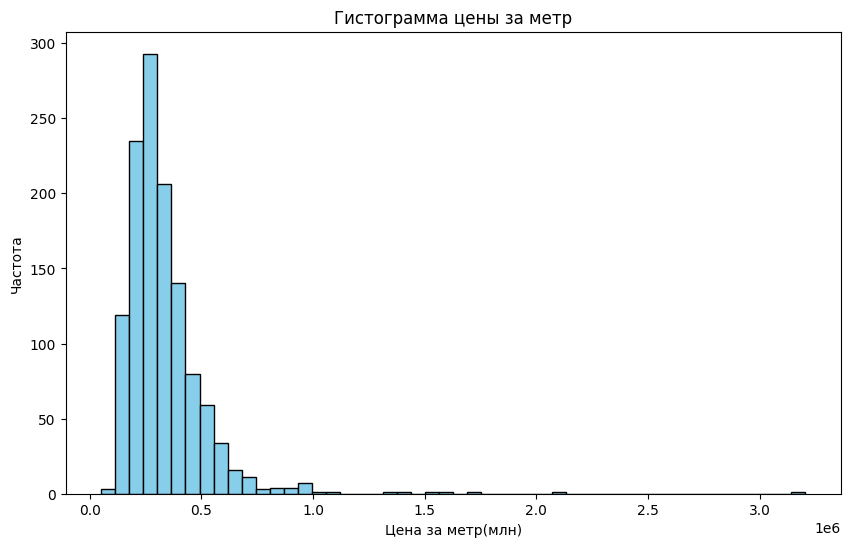

In [164]:
plt.figure(figsize=(10, 6))
plt.hist(df['Цена за метр'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Цена за метр(млн)')
plt.ylabel('Частота')
plt.title('Гистограмма цены за метр')
plt.show()

**Гистограмма распределения времени до метро**

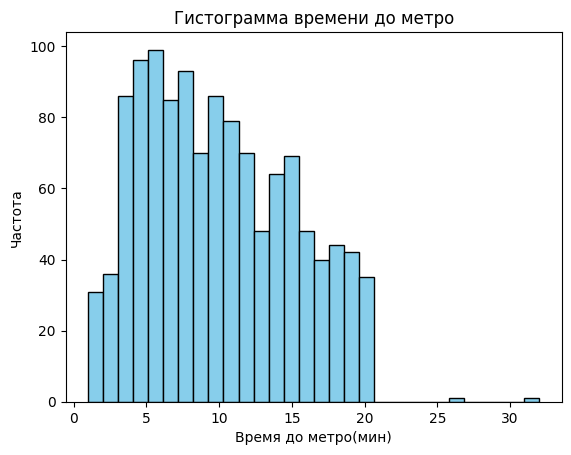

In [165]:
plt.hist(df['Время до метро(мин)'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Время до метро(мин)')
plt.ylabel('Частота')
plt.title('Гистограмма времени до метро')
plt.show()

**Зависимость цены от времени до метро**

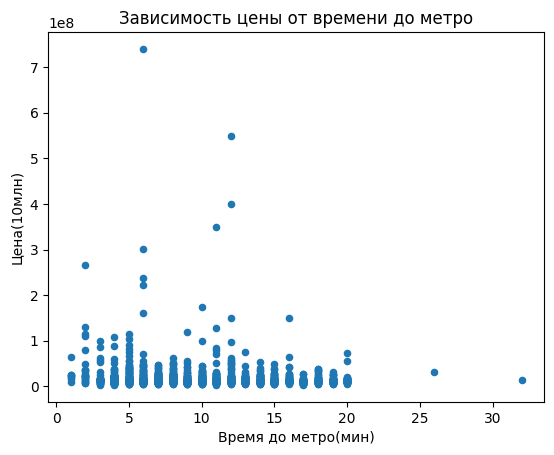

In [166]:
df.plot(x='Время до метро(мин)', y='Цена', kind='scatter')
plt.xlabel('Время до метро(мин)')
plt.ylabel('Цена(10млн)')
plt.title('Зависимость цены от времени до метро')
plt.show()

**Чтобы увидеть более подробную картину зависимости выберем квартиры до 60млн.**

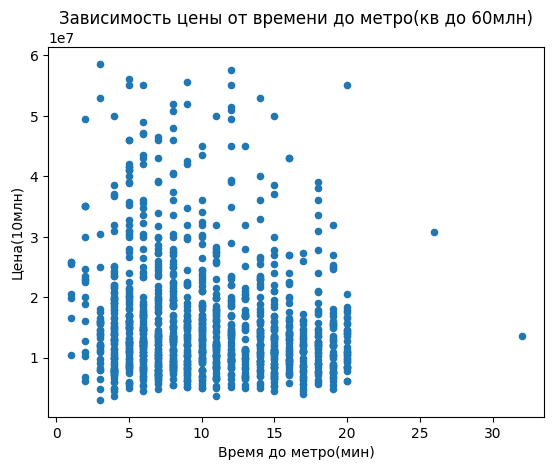

In [167]:
data = {'X' : df['Цена'][(df[df['Цена'] < 60000000].index)],
'Y' : df['Время до метро(мин)'][(df[df['Цена'] < 60000000].index)]}
data = pd.DataFrame(data)
data.plot(x='Y', y='X', kind='scatter')
plt.xlabel('Время до метро(мин)')
plt.ylabel('Цена(10млн)')
plt.title('Зависимость цены от времени до метро(кв до 60млн)')
plt.show()

**Зависимость цены за метр от этажа**

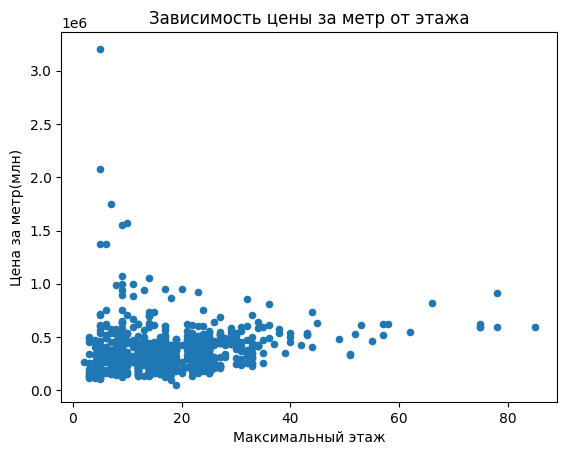

In [168]:
df.plot(x='Максимальный этаж', y='Цена за метр', kind='scatter')
plt.xlabel('Максимальный этаж')
plt.ylabel('Цена за метр(млн)')
plt.title('Зависимость цены за метр от этажа')
plt.show()

**Построим корреляционную матрицу**

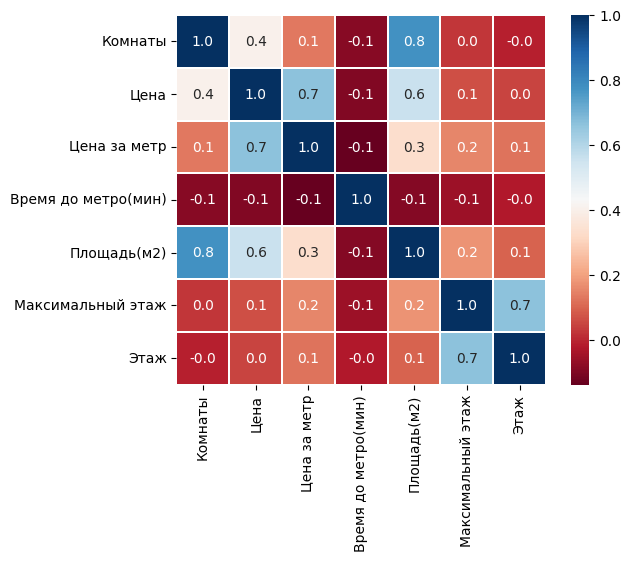

In [169]:
num_columns = df.select_dtypes(include=['int32', 'float32','int64', 'float64']).columns
sns.heatmap(df[num_columns].corr(method='pearson'), 
            square=True, annot=True, fmt=".1f", 
            linewidths=0.1, cmap="RdBu");